In [36]:
# Cell 1: Import the necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [37]:
# Cell 2: Load the CSV files into pandas DataFrames
df1 = pd.read_csv('C:/Users/Prachi Desai/Documents/AQI index predicting hactoberfest/Air-Quality-Index-Analysis/data/aqi_scaled.csv')
df2 = pd.read_csv('C:/Users/Prachi Desai/Documents/AQI index predicting hactoberfest/Air-Quality-Index-Analysis/data/cleaned_delhi_air_quality_data.csv')

# Print the DataFrames to get an overview of the data
print(df1)
# print(df2)



             co        no       no2        o3       so2     pm2_5      pm10  \
0      0.321787  0.010030  0.289898  0.023973  0.260175  0.668815  0.659978   
1      0.460346  0.107414  0.370809  0.000565  0.382894  0.775646  0.783901   
2      0.584321  0.243760  0.418761  0.001942  0.494464  0.856636  0.876643   
3      0.584321  0.235487  0.466670  0.011351  0.568767  0.839820  0.863416   
4      0.562443  0.198327  0.496656  0.030293  0.643147  0.827175  0.855412   
...         ...       ...       ...       ...       ...       ...       ...   
15164  0.205105  0.021400  0.143069  0.058697  0.197022  0.415796  0.457173   
15165  0.201459  0.031475  0.134108  0.082052  0.226727  0.404288  0.441666   
15166  0.226983  0.037669  0.156576  0.099740  0.297365  0.437295  0.467539   
15167  0.150411  0.041782  0.212003  0.126256  0.739825  0.291656  0.294083   
15168  0.119417  0.039749  0.229969  0.141402  0.821612  0.212202  0.208296   

            nh3  
0      0.551818  
1      0.793117

In [38]:
# Cell 3: Check for missing values in df2
missing_values = df1.isnull().sum()
print(missing_values)



co       0
no       0
no2      0
o3       0
so2      0
pm2_5    0
pm10     0
nh3      0
dtype: int64


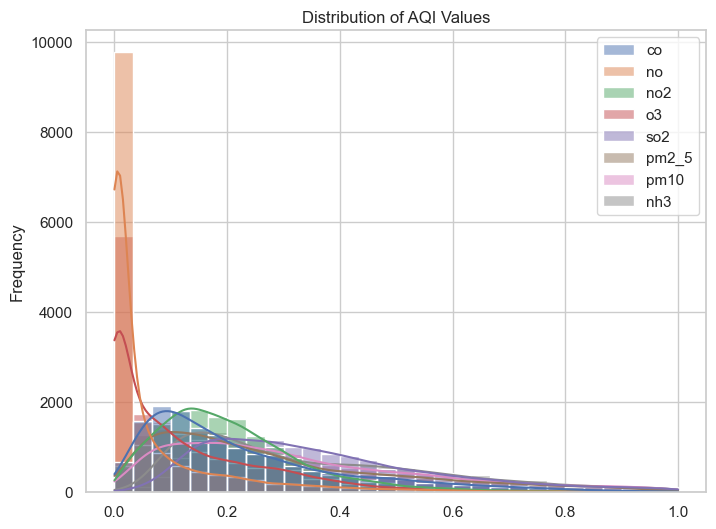

In [39]:
# Cell 4: Plot a histogram of the data in df1
plt.figure(figsize=(8, 6))
sns.histplot(df1, kde=True, bins=30)
plt.title('Distribution of AQI Values')
plt.ylabel('Frequency')
plt.show()



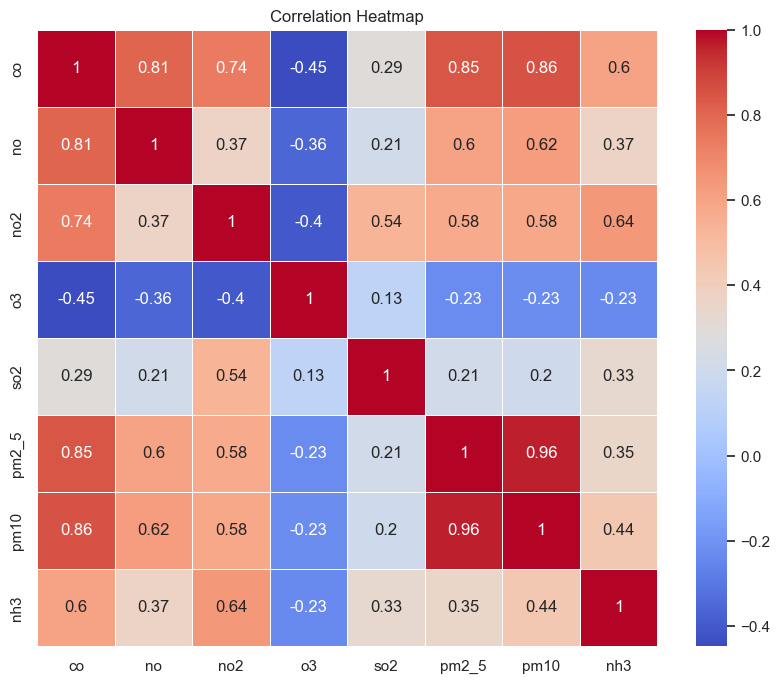

In [40]:
# Cell 5: Compute and plot the correlation heatmap for df1
corr_matrix = df1.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()



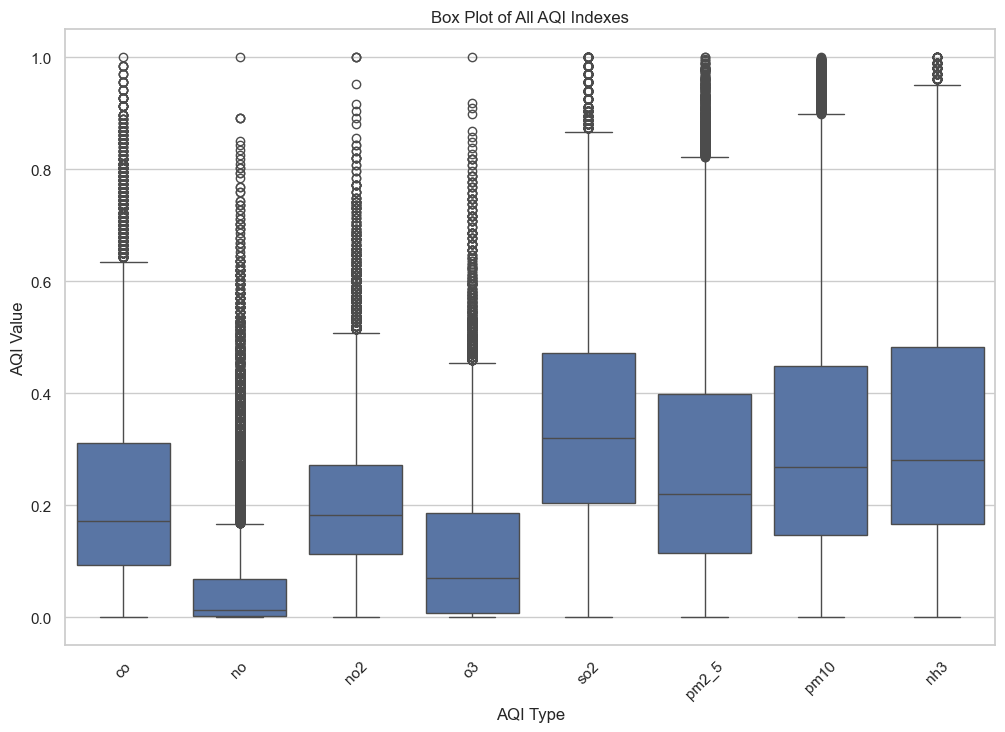

In [41]:
# Plot a boxplot for the AQI columns in df1
# Assuming your AQI columns are named 'co', 'no', 'no2', 'o3', 'so2', 'pm2_5', 'pm10', 'nh3'
aqi_columns = ['co', 'no', 'no2', 'o3', 'so2', 'pm2_5', 'pm10', 'nh3']  # Adjust as needed

# Melt the DataFrame for plotting
df_melted = df1.melt(value_vars=aqi_columns, var_name='AQI_Type', value_name='AQI_Value')

# Set the aesthetic style of the plots
sns.set(style="whitegrid")

# Create and display the boxplot
plt.figure(figsize=(12, 8))
sns.boxplot(x='AQI_Type', y='AQI_Value', data=df_melted)
plt.title('Box Plot of All AQI Indexes')
plt.xlabel('AQI Type')
plt.ylabel('AQI Value')
plt.xticks(rotation=45)  # Rotate x-axis labels if necessary
plt.show()

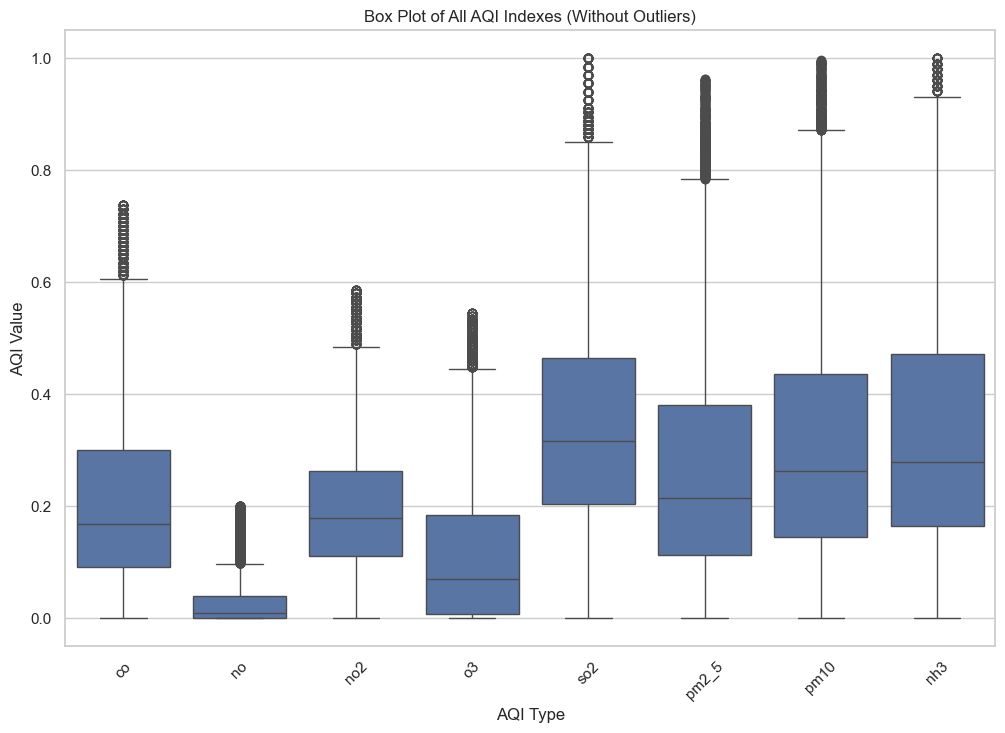

In [42]:
aqi_columns = ['co', 'no', 'no2', 'o3', 'so2', 'pm2_5', 'pm10', 'nh3']

# Removing outliers for each column
filtered_data = pd.DataFrame()
for col in aqi_columns:
    Q1 = df1[col].quantile(0.25)
    Q3 = df1[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 2.0 * IQR
    upper_bound = Q3 + 2.0 * IQR
    
    # Filter out the outliers
    filtered_col = df1[(df1[col] >= lower_bound) & (df1[col] <= upper_bound)][col]
    filtered_data[col] = filtered_col

# Melt the filtered DataFrame for plotting
df_melted_filtered = filtered_data.melt(value_vars=aqi_columns, var_name='AQI_Type', value_name='AQI_Value')

# Set the aesthetic style of the plots
sns.set(style="whitegrid")

# Create and display the box plot without outliers
plt.figure(figsize=(12, 8))
sns.boxplot(x='AQI_Type', y='AQI_Value', data=df_melted_filtered)
plt.title('Box Plot of All AQI Indexes (Without Outliers)')
plt.xlabel('AQI Type')
plt.ylabel('AQI Value')
plt.xticks(rotation=45)
plt.show()

In [43]:
import lightgbm as lgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
import xgboost as xgb

# droping the O3 column as it increses the multicolinearity
df1 = df1.drop(columns=['o3'])  # Exclude O3 
X = df1.drop(columns=['pm2_5'])
y = df1['pm2_5']



In [44]:
# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [45]:
# Optionally scale your features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [53]:
# Create an XGBoost regressor
model = xgb.XGBRegressor(n_estimators=100, learning_rate=0.1, max_depth=5, random_state=42)

# Fit the model to the training data
model.fit(X_train, y_train)

# Optionally, you can make predictions
y_pred = model.predict(X_test)



In [47]:
# Predict on the test set
y_pred = model.predict(X_test)

In [55]:
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
# Calculate regression metrics
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

# Print the results
print(f'Mean Squared Error: {mse:.2f}')
print(f'R-squared: {r2:.2f}')
print(f'Mean Absolute Error: {mae:.2f}')



Mean Squared Error: 0.00
R-squared: 0.98
Mean Absolute Error: 0.02
